In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C:\\Users\\UserName\\Desktop\\인공지능 개론\\실습 시험 데이터\\car.data")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [39]:
data.shape

(1727, 7)

In [40]:
type(data)

pandas.core.frame.DataFrame

In [41]:
data.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [42]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [43]:
le = LabelEncoder()

for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [44]:
X=data.drop('unacc',axis=1)
X.head()

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [45]:
y = data['unacc']
print(data['unacc'])
y.head()

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: unacc, Length: 1727, dtype: int32


0    2
1    2
2    2
3    2
4    2
Name: unacc, dtype: int32

<h3>#EDA 수행</h3>

Text(0.5, 1.0, 'unacc')

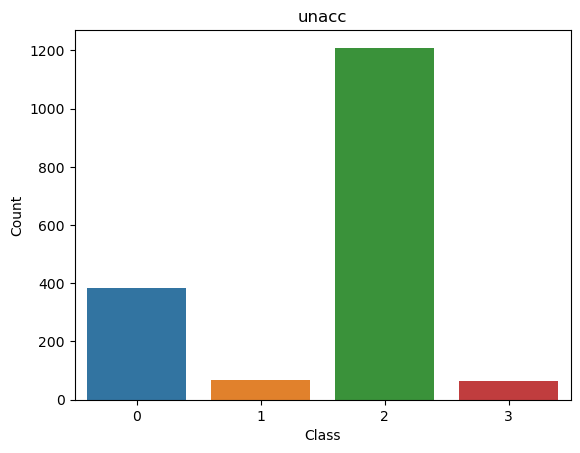

In [56]:
sns.countplot(data = X, x=y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("unacc")

<h3>#트레인 테스트 셋 분류</h3>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [48]:
X_train.head()

,vhigh,vhigh.1,2,2.1,small,low
107,3,0,0,0,2,1
900,2,3,1,1,2,2
1708,1,1,3,0,0,0
705,0,2,2,0,1,2
678,0,2,1,0,1,2


In [49]:
y_train.head()

107     2
900     2
1708    2
705     2
678     2
Name: unacc, dtype: int32

In [50]:
X_test.head()

,vhigh,vhigh.1,2,2.1,small,low
599,0,0,2,0,0,1
932,2,3,2,1,0,1
628,0,0,3,0,0,0
1497,1,0,3,1,1,2
1262,2,1,2,2,1,1


In [51]:
y_test.head()

599     2
932     2
628     2
1497    0
1262    2
Name: unacc, dtype: int32

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [53]:
#scv

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.8988439306358381


In [54]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9710982658959537


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))


--- Radom Forest ---
0.9595375722543352
